In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images from 28x28 to 784-dimensional vectors
x_train = x_train.reshape(x_train.shape[0], 28 * 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28 * 28).astype('float32')

# Normalize the images to the range [0, 1]
x_train = x_train / 255
x_test = x_test / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the model
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7039 - loss: 1.1588 - val_accuracy: 0.8799 - val_loss: 0.4817
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8750 - loss: 0.4794 - val_accuracy: 0.8943 - val_loss: 0.4000
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8873 - loss: 0.4156 - val_accuracy: 0.9010 - val_loss: 0.3669
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8976 - loss: 0.3814 - val_accuracy: 0.9047 - val_loss: 0.3496
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8996 - loss: 0.3665 - val_accuracy: 0.9078 - val_loss: 0.3357
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9033 - loss: 0.3473 - val_accuracy: 0.9114 - val_loss: 0.3268
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9041 - loss: 0.3409 - val_accuracy: 0.9130 - val_loss: 0.3193
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9072 - loss: 0.3355 

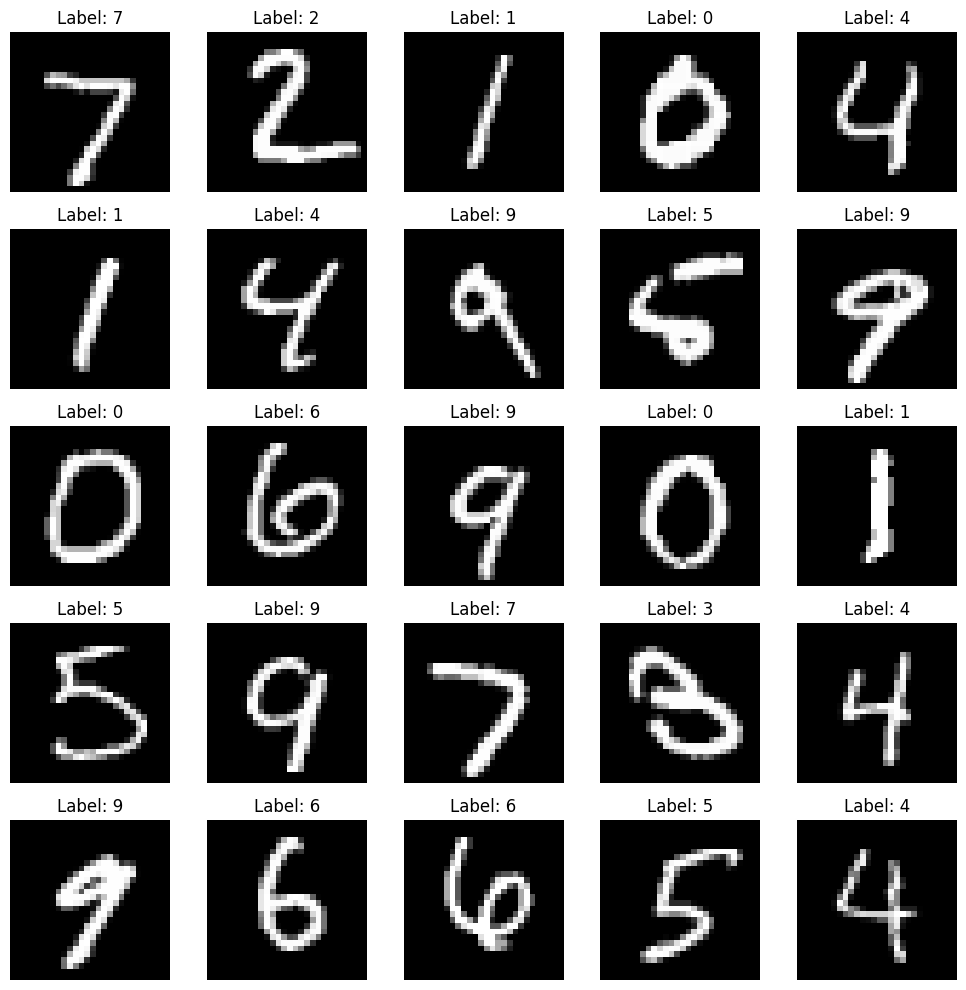

In [3]:
import matplotlib.pyplot as plt

# Visualizing the first 25 test images
plt.figure(figsize=(10, 10))
for i in range(25):
    # Subplot with a 5x5 grid
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape the flat images back to 28x28
    plt.axis('off')  # Turn off axis for cleaner visualization
    plt.title(f"Label: {np.argmax(y_test[i])}")  # Display the true label

plt.tight_layout()
plt.show()
